In [4]:
import pandas as pd

Bert model

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers requests beautifulsoup4 pandas numpy

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [5]:
s = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/merged_skincare.csv')
h = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/merged_haircare.csv')
m = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/merged_makeup.csv')
f = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/merged_fragrance.csv')
p = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/merged_personalcare.csv')

In [6]:
len(s)

597

In [12]:
s = s.dropna()

In [13]:
len(s)

585

In [7]:
s['sentiment1'] = s['review_concat'].apply(lambda x: sentiment_score(x[:597]))

In [14]:
s['sentiment2'] = s['review_2023'].apply(lambda x: sentiment_score(x[:597]))

In [15]:
s['diff_sentiment'] = s['sentiment1'] - s['sentiment2']

In [16]:
s.head()

,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,B000PHP8L4,gentle effective continue use product 1 cheape...,EltaMD UV Lotion SPF Zinc Oxide Full Body Suns...,Recomendado I want to start off saying that I ...,3,4,-1
1,1,B000KPO99I,purchased bought day cream really like product...,L'Oréal Paris Skin Care Age Perfect Night Crea...,I have been using this for years . And literal...,2,5,-3
2,2,B00016XJ4M,exceedingly refreshing feel refreshing not sur...,"Thayers Facial Toner, Witch Hazel with Aloe Ve...",Am in love with this .definitely buying again ...,2,5,-3
3,3,B001DJ9JJU,first product delivered good shape well packag...,Josie Maran 100% Pure Argan Oil - Organic and ...,Very moisturizing I love this moisturizing oil...,1,5,-4
4,4,B0014UCJPO,received quickly made face mask powder distill...,"NOW Solutions, European Clay Powder, Pure Powd...",I bought this because I like natural things ov...,4,4,0


In [17]:
s.to_csv('skincare_sentiment.csv')

In [18]:
h = h.dropna()
m = m.dropna()
f = f.dropna()
p = p.dropna()

In [20]:
len(h)

470

In [21]:
h['sentiment1'] = h['review_concat'].apply(lambda x: sentiment_score(x[:470]))

In [22]:
h['sentiment2'] = h['review_2023'].apply(lambda x: sentiment_score(x[:470]))

In [23]:
h['diff_sentiment'] = h['sentiment1'] - h['sentiment2']

In [24]:
h.head()

,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,B001A3ATP2,came exactly shown bobby pin good size good pr...,"Diane, 2"" Bobby Pins D452, BLACK, 300 Count",Love that you get bunch of bobby-pins in a con...,3,4,-1
1,1,B00099E8ZA,amazing clarifying shampoo smell fantastic mak...,"Neutrogena Anti-Residue Clarifying Shampoo, Ge...",I have used this often to remove build up from...,5,5,0
2,2,B000GFWIOU,used decent hold allows touch movement not rem...,"Nexxus Comb Thru Finishing Spray Hair Spray, H...",Bought for someone else that loves this produc...,3,3,0
3,3,B000R87B1Q,uncomfortable got lost clip went giant 5 rolle...,"Conair Hot Roller Super Clips, White",I picked these up to use with my Remington tra...,1,4,-3
4,4,B001ET78CE,great hold quick easy use 1 alcohol 2 water 3 ...,"GIOVANNI L.A. Hold Hair Spritz, 5 oz. Maximum ...",I absolutely love this hairspray. Reasons I li...,4,5,-1


In [25]:
h.to_csv('haircare_sentiment.csv')

In [26]:
len(m)

50

In [27]:
m['sentiment1'] = m['review_concat'].apply(lambda x: sentiment_score(x[:50]))

In [28]:
m['sentiment2'] = m['review_2023'].apply(lambda x: sentiment_score(x[:50]))

In [29]:
m['diff_sentiment'] = m['sentiment1'] - m['sentiment2']

In [30]:
m.head()

,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,B0019IVEEI,perfect color contouring ashybrownno orange pu...,theBalm Bahama Mama Bronzer,Small with a sleeve for product. Helps it from...,5,3,2
1,1,B000WYZ9Q4,switching crueltyfree product thought would go...,"NYX PROFESSIONAL MAKEUP Doll Eye Mascara, Volu...",This mascara was bought as a substitute for ub...,2,5,-3
2,2,B00008KA8D,lipstick really stay full day probably longer ...,"Revlon ColorStay Overtime Liquid Lipcolor, Kee...","Luxury of a much more expensive lipstick, both...",2,3,-1
3,3,B000H3EOLG,love makeup cannot beat price mi esposa le gus...,"Revlon ColorStay Makeup, Normal/Dry Skin, Natu...",I have used this foundation for a few years. I...,5,5,0
4,4,B000H3I3Y0,love color lip gloss however not suffer chroni...,"Revlon Super Lustrous Lipgloss, SPF 15, Nude L...",I love the soft creamy texture and just a litt...,3,5,-2


In [31]:
m.to_csv('makeup_sentiment.csv')

In [32]:
len(f)

50

In [33]:
f['sentiment1'] = f['review_concat'].apply(lambda x: sentiment_score(x[:50]))

In [34]:
f['sentiment2'] = m['review_2023'].apply(lambda x: sentiment_score(x[:50]))

In [35]:
f['diff_sentiment'] = f['sentiment1'] - f['sentiment2']

In [36]:
f.head()

,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,B000P22TIY,good le 15 best nautica tried great product gr...,Nautica Voyage By Nautica For Men Eau De Toile...,I have just recently decided to get into the ...,5,3,2
1,1,B001FWXISS,love absolutely love scent husband always gett...,Calvin Klein intense euphoria for Men Eau de T...,I tried to order a another bottle and they sai...,5,5,0
2,2,B000C1ZDTU,bought based review let say smell alright noth...,"Lovely by Sarah Jessica Parker for Women, Eau ...",I usually wear sweet perfumes and this one is ...,1,3,-2
3,3,B000GIOBY2,tiene muy buen olor bought husband not good se...,Guess By Parlux Fragrances For Men. Eau De Toi...,Good price thanks Although it smells great it ...,3,5,-2
4,4,B000P20RAQ,este perfume encanta sweet smell like overpowe...,"Fantasy by Britney Spears for Women, Set (Eau ...","Calidad, precio I got this one year for a Chri...",5,5,0


In [37]:
f.to_csv('fragrance_sentiment.csv')

In [38]:
len(p)

22

In [39]:
p['sentiment1'] = p['review_concat'].apply(lambda x: sentiment_score(x[:22]))

In [40]:
p['sentiment2'] = p['review_2023'].apply(lambda x: sentiment_score(x[:22]))

In [41]:
p['diff_sentiment'] = p['sentiment1'] - p['sentiment2']

In [42]:
p.head()

,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,B000XE1ZI4,using week felt difference first use foot not ...,"Spongeables Pedi-Scrub Foot Buffer, Lavender S...",I would buy this again. exfoliates and lathers...,3,5,-2
1,1,B000052X9G,bunch promise well work bottle twoweek supply ...,Nullo Internal Deodorant (135 Caplets),"I’m told that for many people, 2 Nullo a day (...",5,5,0
2,2,B000TUC9AA,ordered husband liked review love brush first ...,"Swissco Deluxe Bath Brush, Tortoise 1 ea",Hubby got this for shower use. He says its a l...,4,5,-1
3,3,B000MZX6QI,feel good skin invigorating almost massage lik...,Salux Nylon Japanese Beauty Skin Bath Wash Clo...,"I absolutely loved this scrub, I was actually ...",5,5,0
4,4,B001ECQ5FC,cucumber scent no exception smell like fresh c...,Dove Ultimate go fresh Cool Essentials Anti-pe...,This is my favorite deodorant and I would have...,4,5,-1


In [43]:
p.to_csv('personalcare_sentiment.csv')

In [6]:
ss = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/skincare_sentiment.csv')
hh = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/haircare_sentiment.csv')
mm = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/makeup_sentiment.csv')
ff = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/fragrance_sentiment.csv')
pp = pd.read_csv('C:/Users/DELL/Desktop/major_project/datafiles/dfiles/personalcare_sentiment.csv')

Forming word clouds

In [14]:
#considering the products whose sentiment got reduced the most.
s_dict = {}
for i in ss.index:
    var = ss.loc[i][8]
    if var in s_dict:
        s_dict[var] += 1
    else:
        s_dict[var] = 1

In [13]:
print(s_dict)

{-1: 98, -3: 121, -4: 67, 0: 117, -2: 90, 3: 12, 1: 52, 2: 28}


In [15]:
ss.head()

,Unnamed: 0.1,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,0,B000PHP8L4,gentle effective continue use product 1 cheape...,EltaMD UV Lotion SPF Zinc Oxide Full Body Suns...,Recomendado I want to start off saying that I ...,3,4,-1
1,1,1,B000KPO99I,purchased bought day cream really like product...,L'Oréal Paris Skin Care Age Perfect Night Crea...,I have been using this for years . And literal...,2,5,-3
2,2,2,B00016XJ4M,exceedingly refreshing feel refreshing not sur...,"Thayers Facial Toner, Witch Hazel with Aloe Ve...",Am in love with this .definitely buying again ...,2,5,-3
3,3,3,B001DJ9JJU,first product delivered good shape well packag...,Josie Maran 100% Pure Argan Oil - Organic and ...,Very moisturizing I love this moisturizing oil...,1,5,-4
4,4,4,B0014UCJPO,received quickly made face mask powder distill...,"NOW Solutions, European Clay Powder, Pure Powd...",I bought this because I like natural things ov...,4,4,0


In [6]:
# 3 is the highest gap in the sentiment
y_2018 = []
y_2023 = []
s_prod_names = []

for i in ss.index:
    if ss.loc[i][8] == 3:
        y_2018.append(ss.loc[i][3])
        y_2023.append(ss.loc[i][5])
        s_prod_names.append(ss.loc[i][4])

In [19]:
# products with less ratings.
for i in s_prod_names:
    print(i)

Alba Botanica Hawaiian Sunscreen Lotion, SPF 30, Aloe Vera, 4 Oz (Packaging May Vary)
Mario Badescu Drying Lotion, 1 Fl Oz
REVIVA LABS - Elastin + DMAE Night Créme (2.oz)
One With Nature Dead Sea Mud Dead Sea Minerals Soap, 7 Ounce Bar
Suki Skincare Exfoliate Foaming Cleanser - With Natural Sugar & Colloidal Oat - Mechanical Exfoliant that Reduces Dry Skin Buildup While Promoting Raidant, Smooth, Soft Skin - 4 oz
Desert Essence Herbal Blemish Touch Stick with Natural Extracts & Essential Oils - .31 Fl Ounce - Antiseptic Tea Tree Oil - Chamomile - Lavender - Palmarosa - Clear & Radiant Skin
Mario Badescu Seaweed Night Cream, 1 oz
Murad Resurgence Age-Balancing Night Cream – Anti-Aging Night Cream with Retinol and B5 – Hydrating Night Moisturizer, 1.7 Fl Oz
Adovia Dead Sea Soap - Healing & Beautifying Soap Bar - Unique Combination of Minerals from Dead Sea Mud - Bar Soap for Women & Men, Cleansing, Hydration & Moisturizing - Hand & Body Soap Bar - 4.4oz
Nature's Gate Acai Velvet Moisture

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [8]:
s_comment_words = ''
s_stopwords = set(STOPWORDS)

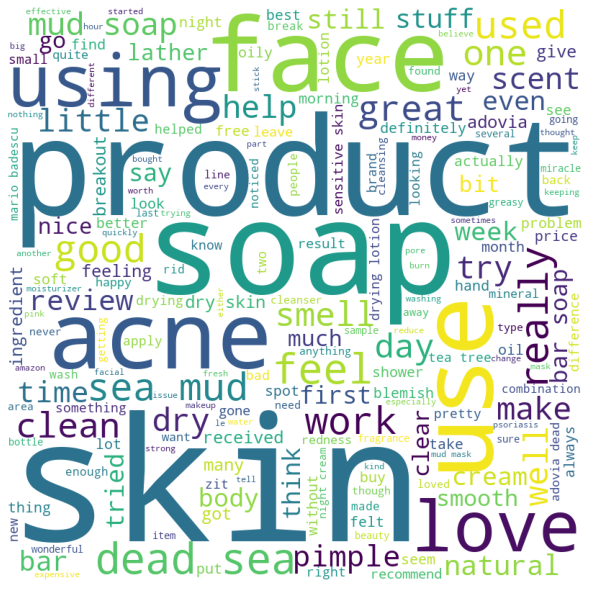

In [9]:
for val in y_2018:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    s_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = s_stopwords, min_font_size = 10).generate(s_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [54]:
#decreased sentiment

In [12]:
sd_comment_words = ''
sd_stopwords = set(STOPWORDS)

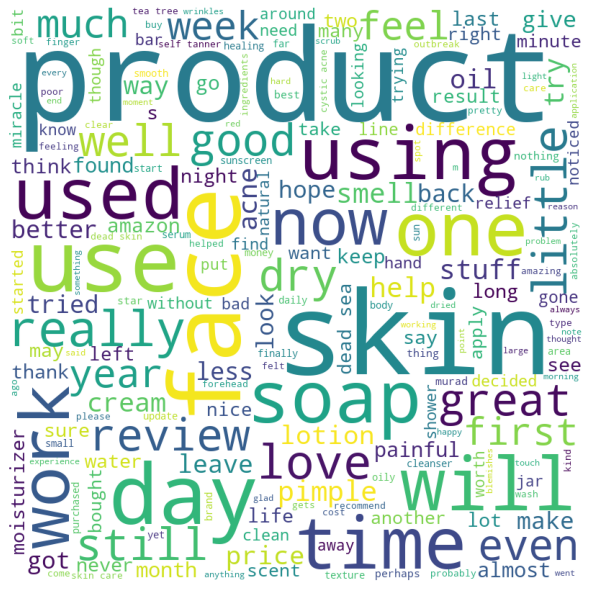

In [14]:
for val in y_2023:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    sd_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = sd_stopwords, min_font_size = 10).generate(sd_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#haircare

In [5]:
hh.head()

,Unnamed: 0.1,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,0,B001A3ATP2,came exactly shown bobby pin good size good pr...,"Diane, 2"" Bobby Pins D452, BLACK, 300 Count",Love that you get bunch of bobby-pins in a con...,3,4,-1
1,1,1,B00099E8ZA,amazing clarifying shampoo smell fantastic mak...,"Neutrogena Anti-Residue Clarifying Shampoo, Ge...",I have used this often to remove build up from...,5,5,0
2,2,2,B000GFWIOU,used decent hold allows touch movement not rem...,"Nexxus Comb Thru Finishing Spray Hair Spray, H...",Bought for someone else that loves this produc...,3,3,0
3,3,3,B000R87B1Q,uncomfortable got lost clip went giant 5 rolle...,"Conair Hot Roller Super Clips, White",I picked these up to use with my Remington tra...,1,4,-3
4,4,4,B001ET78CE,great hold quick easy use 1 alcohol 2 water 3 ...,"GIOVANNI L.A. Hold Hair Spritz, 5 oz. Maximum ...",I absolutely love this hairspray. Reasons I li...,4,5,-1


In [6]:
h_dict = {}
for i in hh.index:
    var = hh.loc[i][8]
    if var in h_dict:
        h_dict[var] += 1
    else:
        h_dict[var] = 1

In [7]:
print(h_dict)

{-1: 72, 0: 95, -3: 69, 1: 51, 3: 16, -2: 84, -4: 58, 2: 21, 4: 4}


In [6]:
# 4 is the highest gap in the sentiment
hy_2018 = []
hy_2023 = []
h_prod_names = []

for i in hh.index:
    if hh.loc[i][8] == 4:
        hy_2018.append(hh.loc[i][3])
        hy_2023.append(hh.loc[i][5])
        h_prod_names.append(hh.loc[i][4])

In [10]:
for i in h_prod_names:
    print(i)

Free & Clear Liquid Cleanser | Fragrance, Gluten and Sulfate Free | For Sensitive Skin | 32 Fl Oz
Kenra Platinum Silkening Gloss
Suave Professionals Conditioner, Deep Moisture, 12.6 oz
TIGI Catwalk Curls Rock Amplifier - For Defined Curls & Waves, Enhances Natural Texture, Provides Hold & Control, Humidity & Heat Protection, 4 oz (Pack of 2)


In [10]:
h_comment_words = ''
h_stopwords = set(STOPWORDS)

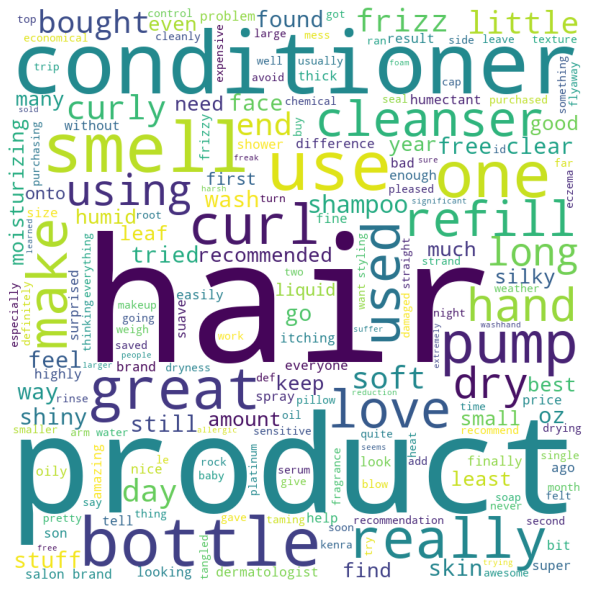

In [11]:
for val in hy_2018:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    h_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = h_stopwords, min_font_size = 10).generate(h_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

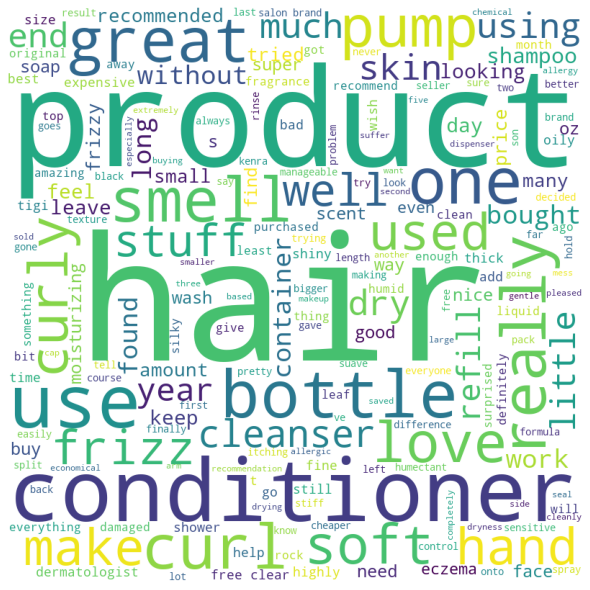

In [12]:
for val in hy_2023:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    h_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = h_stopwords, min_font_size = 10).generate(h_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#makeup

In [13]:
mm.head()

,Unnamed: 0.1,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,0,B0019IVEEI,perfect color contouring ashybrownno orange pu...,theBalm Bahama Mama Bronzer,Small with a sleeve for product. Helps it from...,5,3,2
1,1,1,B000WYZ9Q4,switching crueltyfree product thought would go...,"NYX PROFESSIONAL MAKEUP Doll Eye Mascara, Volu...",This mascara was bought as a substitute for ub...,2,5,-3
2,2,2,B00008KA8D,lipstick really stay full day probably longer ...,"Revlon ColorStay Overtime Liquid Lipcolor, Kee...","Luxury of a much more expensive lipstick, both...",2,3,-1
3,3,3,B000H3EOLG,love makeup cannot beat price mi esposa le gus...,"Revlon ColorStay Makeup, Normal/Dry Skin, Natu...",I have used this foundation for a few years. I...,5,5,0
4,4,4,B000H3I3Y0,love color lip gloss however not suffer chroni...,"Revlon Super Lustrous Lipgloss, SPF 15, Nude L...",I love the soft creamy texture and just a litt...,3,5,-2


In [14]:
m_dict = {}
for i in mm.index:
    var = mm.loc[i][8]
    if var in m_dict:
        m_dict[var] += 1
    else:
        m_dict[var] = 1

In [15]:
print(m_dict)

{2: 7, -3: 2, -1: 4, 0: 13, -2: 9, -4: 6, 4: 1, 1: 5, 3: 3}


In [17]:
#considering reviews with difference gap - 4, 3, 2
# 4 is the highest gap in the sentiment
my_2018 = []
my_2023 = []
m_prod_names = []

for i in mm.index:
    if mm.loc[i][8] >= 2:
        my_2018.append(mm.loc[i][3])
        my_2023.append(mm.loc[i][5])
        m_prod_names.append(mm.loc[i][4])

In [19]:
for i in m_prod_names:
    print(i)

theBalm Bahama Mama Bronzer
COVERGIRL Cheekers Blendable Powder Blush, Classic Pink, 1 Count (packaging may vary)
Trish McEvoy Lash Curling Mascara, Jet Black.18 oz/5 g
Bioderma - Sensibio H2O - Micellar Water - Cleansing and Make-Up Removing - Refreshing Feeling - for Sensitive Skin
CoverGirl Professional Super Thick Lash Mascara, Brown 315, 0.3 Ounce
Almay Liquid Eyeliner, Waterproof and Longwearing, Hypoallergenic, Cruelty Free, -Fragrance Free, Ophthalmologist Tested, 221 Black, 0.1 oz
COVERGIRL Continuous Color Lipstick Bronzed Peach 015, .13 oz (packaging may vary)
100% Natural Lipcolor - Berry Cordial
My Spots Are Consealed Light Color
REVIVA LABS - Makeup Primer (1.fl.oz)
Christian Waterproof Super Long Lash Treatment Mascara Mammey Oil Black


In [20]:
m_comment_words = ''
m_stopwords = set(STOPWORDS)

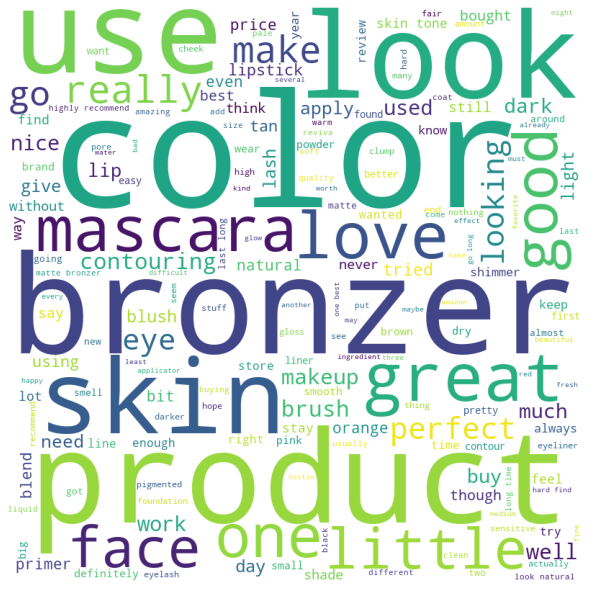

In [21]:
for val in my_2018:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    m_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = m_stopwords, min_font_size = 10).generate(m_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

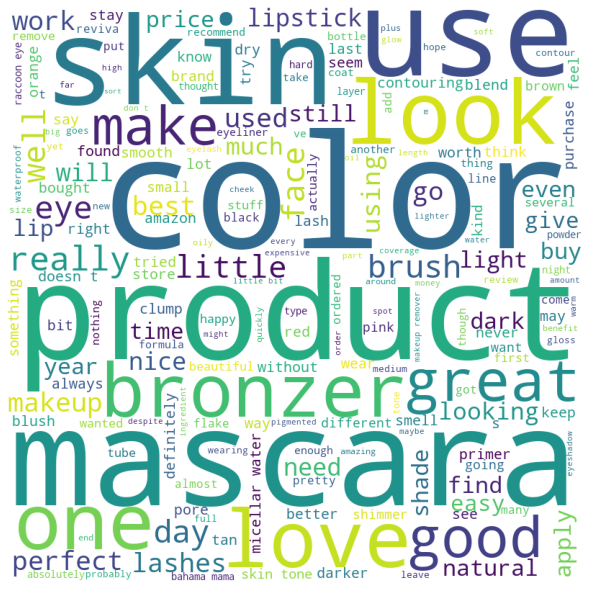

In [23]:
for val in my_2023:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    m_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = m_stopwords, min_font_size = 10).generate(m_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#fragrance

In [24]:
ff.head()

,Unnamed: 0.1,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,0,B000P22TIY,good le 15 best nautica tried great product gr...,Nautica Voyage By Nautica For Men Eau De Toile...,I have just recently decided to get into the ...,5,3,2
1,1,1,B001FWXISS,love absolutely love scent husband always gett...,Calvin Klein intense euphoria for Men Eau de T...,I tried to order a another bottle and they sai...,5,5,0
2,2,2,B000C1ZDTU,bought based review let say smell alright noth...,"Lovely by Sarah Jessica Parker for Women, Eau ...",I usually wear sweet perfumes and this one is ...,1,3,-2
3,3,3,B000GIOBY2,tiene muy buen olor bought husband not good se...,Guess By Parlux Fragrances For Men. Eau De Toi...,Good price thanks Although it smells great it ...,3,5,-2
4,4,4,B000P20RAQ,este perfume encanta sweet smell like overpowe...,"Fantasy by Britney Spears for Women, Set (Eau ...","Calidad, precio I got this one year for a Chri...",5,5,0


In [7]:
f_dict = {}
for i in ff.index:
    var = ff.loc[i][8]
    if var in f_dict:
        f_dict[var] += 1
    else:
        f_dict[var] = 1

In [8]:
print(f_dict)

{2: 7, 0: 21, -2: 6, -4: 4, 1: 4, 4: 2, -3: 1, -1: 3, 3: 2}


In [7]:
#considering reviews with difference gap - 4, 3, 2
# 4 is the highest gap in the sentiment
fy_2018 = []
fy_2023 = []
f_prod_names = []

for i in ff.index:
    if ff.loc[i][8] >= 2:
        fy_2018.append(ff.loc[i][3])
        fy_2023.append(ff.loc[i][5])
        f_prod_names.append(ff.loc[i][4])

In [12]:
for i in f_prod_names:
    print(i)

Nautica Voyage By Nautica For Men Eau De Toilette Spray, 100 ml
Wings by Giorgio Beverly Hills for Women, Eau De Toilette Spray, 3-Ounce
Avon Black Suede for Men Eau De Toilette Spray - 3.4 Ounce
Sung Homme by Alfred Sung 3.4 oz Eau de Toilette Spray
Delicious Cotton Candy by Gale Hayman 100ml 3.3oz EDT Spray
Eau Des Merveilles By Hermes For Women. Eau De Toilette Spray 3.3 Oz.
Muguet Des Bois By Coty For Women. Cologne Spray 1.8 Oz
Clubman Special Reserve Shave Cologne, After Shave Macho Fragrance, 6 fl oz
Jovan Musk for Women Musk Oil, 0.33 Fl Oz
Nag Champa - Triloka Perfume Oil - 1/8 Ounce Bottle
D & G Light Blue By Dolce & Gabbana For Men Eau De Toilette Spray, 4.2-Ounces


In [11]:
f_comment_words = ''
f_stopwords = set(STOPWORDS)

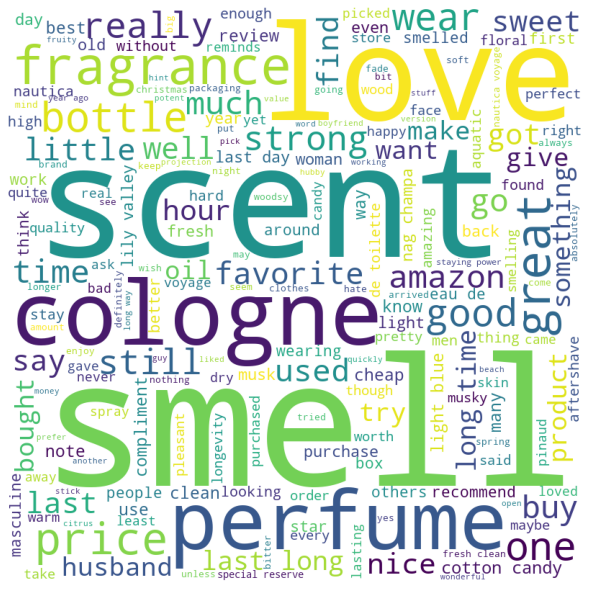

In [12]:
for val in fy_2018:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    f_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = f_stopwords, min_font_size = 10).generate(f_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

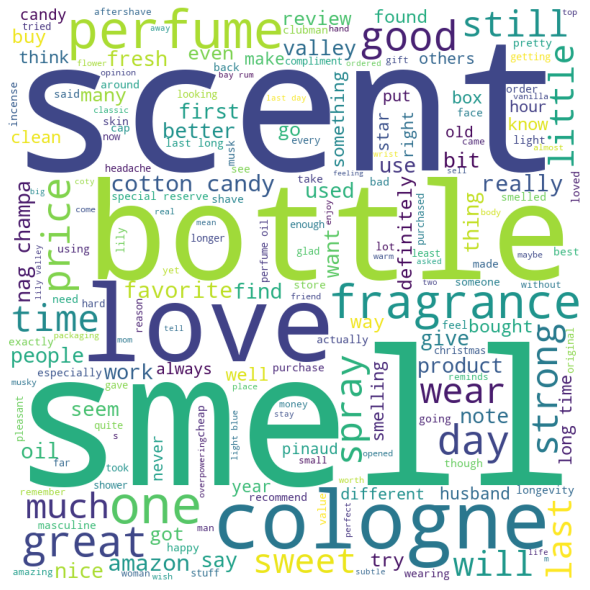

In [15]:
for val in fy_2023:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    f_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = f_stopwords, min_font_size = 10).generate(f_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#personal care

In [16]:
pp.head()

,Unnamed: 0.1,Unnamed: 0,asin,review_concat,name,review_2023,sentiment1,sentiment2,diff_sentiment
0,0,0,B000XE1ZI4,using week felt difference first use foot not ...,"Spongeables Pedi-Scrub Foot Buffer, Lavender S...",I would buy this again. exfoliates and lathers...,3,5,-2
1,1,1,B000052X9G,bunch promise well work bottle twoweek supply ...,Nullo Internal Deodorant (135 Caplets),"I’m told that for many people, 2 Nullo a day (...",5,5,0
2,2,2,B000TUC9AA,ordered husband liked review love brush first ...,"Swissco Deluxe Bath Brush, Tortoise 1 ea",Hubby got this for shower use. He says its a l...,4,5,-1
3,3,3,B000MZX6QI,feel good skin invigorating almost massage lik...,Salux Nylon Japanese Beauty Skin Bath Wash Clo...,"I absolutely loved this scrub, I was actually ...",5,5,0
4,4,4,B001ECQ5FC,cucumber scent no exception smell like fresh c...,Dove Ultimate go fresh Cool Essentials Anti-pe...,This is my favorite deodorant and I would have...,4,5,-1


In [17]:
p_dict = {}
for i in pp.index:
    var = pp.loc[i][8]
    if var in p_dict:
        p_dict[var] += 1
    else:
        p_dict[var] = 1

In [18]:
print(p_dict)

{-2: 3, 0: 5, -1: 6, -4: 3, 4: 1, 2: 1, 3: 1, 1: 2}


In [19]:
#considering reviews with difference gap  - 4, 3, 2, 1
# 4 is the highest gap in the sentiment
py_2018 = []
py_2023 = []
p_prod_names = []

for i in pp.index:
    if pp.loc[i][8] > 0:
        py_2018.append(pp.loc[i][3])
        py_2023.append(pp.loc[i][5])
        p_prod_names.append(pp.loc[i][4])

In [20]:
for i in p_prod_names:
    print(i)

Vagisil Odor Block Feminine Deodorant Powder for Women, Talc-Free, Gynecologist Tested, 8 Ounce (Packaging May Vary)
SALUX Nylon Japanese Beauty Skin Bath Wash Cloth/Towel - Blue
Mineral Bath Salt Soak with Brittany Seaweed, Relax + Detox
Pond's Cold Cream Cleanser 9.5 oz (Pack of 3)
Bálla Body Powder for Men - Original Formula, 100g


In [21]:
p_comment_words = ''
p_stopwords = set(STOPWORDS)

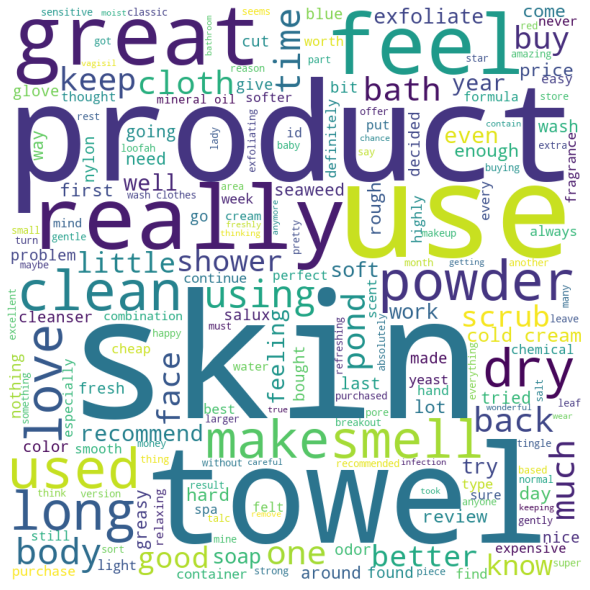

In [22]:
for val in py_2018:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    p_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = p_stopwords, min_font_size = 10).generate(p_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

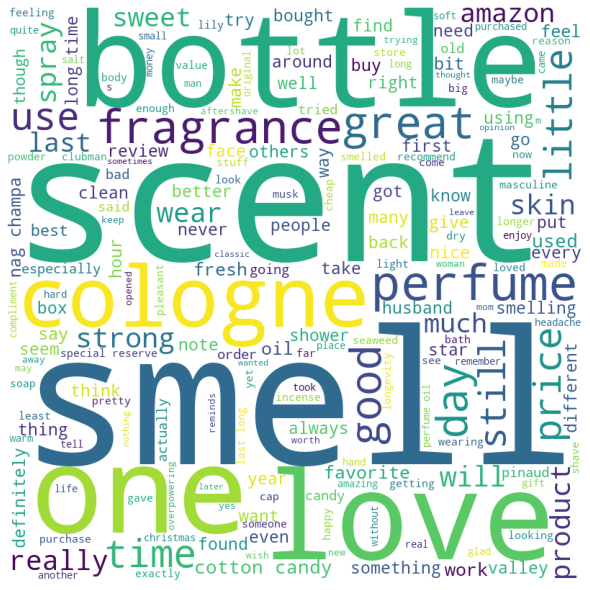

In [23]:
for val in py_2023:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    f_comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = f_stopwords, min_font_size = 10).generate(f_comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()